In [1]:
!pip install seaborn

In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Read in Air Quality data by county
aqi_county_2015_2020_df = pd.read_csv('/content/county_annual_aqi.csv')
display(aqi_county_2015_2020_df.shape)
display(aqi_county_2015_2020_df.head())

(6151, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,205,58,1,0,0,0,129,57,39,0,0,169,95,0
1,Alabama,Clay,2015,112,73,39,0,0,0,0,92,56,43,0,0,0,112,0
2,Alabama,Colbert,2015,280,221,59,0,0,0,0,76,56,39,0,0,179,101,0
3,Alabama,DeKalb,2015,363,294,68,1,0,0,0,101,55,38,0,0,284,79,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0


In [33]:
# Read in Air Quality data by State (Washington, New York, New Mexico)
aqi_WA_NY_NM_2015_2020_df = pd.read_csv('/content/aqi_WA_NY_NM_2015_2020.csv')
display(aqi_WA_NY_NM_2015_2020_df.shape)
display(aqi_WA_NY_NM_2015_2020_df.head())

(139, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [34]:
# Read in Air Quality data by State (Washington, New York, Texas)
aqi_WA_NY_TX_2015_2020_df = pd.read_csv('/content/aqi_WA_NY_TX_2015_2020.csv')
display(aqi_WA_NY_TX_2015_2020_df.shape)
display(aqi_WA_NY_TX_2015_2020_df.head())

(237, 56)

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.80,0.50,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
1,53,33,80,45201,6,47.568236,-122.308628,WGS84,Benzene,7,...,0.79,0.41,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
2,53,33,30,45201,6,47.597222,-122.319722,WGS84,Benzene,7,...,1.62,1.12,Seattle-10th & Weller,10th & Weller,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
3,53,33,34,45201,6,47.600833,-122.314444,NAD83,Benzene,7,...,1.36,0.92,Seattle-Yesler Way,1301 Yesler Way,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21
4,53,33,35,45201,6,47.599444,-122.326111,NAD83,Benzene,7,...,1.51,0.99,Seattle-6th & Jackson,602 S Jackson St,Washington,King,Seattle,42660.0,"Seattle-Tacoma-Bellevue, WA",2020-05-21


In [35]:
# Read in Global Health data concerning respitory illness
ihme_gbd_2015_2020_df = pd.read_csv('/content/IHME-GBD_2021_DATA-fd6afd4d-1.csv')
display(ihme_gbd_2015_2020_df.shape)
display(ihme_gbd_2015_2020_df.head())

(189, 16)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,555,New York,1,Male,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2000,0.054833,NaN,NaN
1,27,Probability of death,555,New York,2,Female,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2000,0.052292,NaN,NaN
2,27,Probability of death,555,New York,3,Both,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2000,0.053036,NaN,NaN
3,27,Probability of death,554,New Mexico,1,Male,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2000,0.084241,NaN,NaN
4,27,Probability of death,554,New Mexico,2,Female,22,All ages,508,Chronic respiratory diseases,8,Probability of death,2000,0.074524,NaN,NaN


In [36]:
# Display info on the AQI by county DataFrame
display(aqi_county_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                6151 non-null   object
 1   County                               6151 non-null   object
 2   Year                                 6151 non-null   int64 
 3   Days with AQI                        6151 non-null   int64 
 4   Good Days                            6151 non-null   int64 
 5   Moderate Days                        6151 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  6151 non-null   int64 
 7   Unhealthy Days                       6151 non-null   int64 
 8   Very Unhealthy Days                  6151 non-null   int64 
 9   Hazardous Days                       6151 non-null   int64 
 10  Max AQI                              6151 non-null   int64 
 11  90th Percentile AQI                  6151 n

None

In [37]:
# Display info on the AQI by State DataFrame
# display(aqi_WA_NY_NM_2015_2020_df.info())
display(aqi_WA_NY_TX_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state_code                   237 non-null    int64  
 1   county_code                  237 non-null    int64  
 2   site_number                  237 non-null    int64  
 3   parameter_code               237 non-null    int64  
 4   poc                          237 non-null    int64  
 5   latitude                     237 non-null    float64
 6   longitude                    237 non-null    float64
 7   datum                        237 non-null    object 
 8   parameter                    237 non-null    object 
 9   sample_duration_code         237 non-null    int64  
 10  sample_duration              237 non-null    object 
 11  pollutant_standard           0 non-null      float64
 12  metric_used                  237 non-null    object 
 13  method              

None

In [38]:
# Display info on the Global Health data concerning respitory illness
display(ihme_gbd_2015_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     189 non-null    int64  
 1   measure_name   189 non-null    object 
 2   location_id    189 non-null    int64  
 3   location_name  189 non-null    object 
 4   sex_id         189 non-null    int64  
 5   sex_name       189 non-null    object 
 6   age_id         189 non-null    int64  
 7   age_name       189 non-null    object 
 8   cause_id       189 non-null    int64  
 9   cause_name     189 non-null    object 
 10  metric_id      189 non-null    int64  
 11  metric_name    189 non-null    object 
 12  year           189 non-null    int64  
 13  val            189 non-null    float64
 14  upper          0 non-null      float64
 15  lower          0 non-null      float64
dtypes: float64(3), int64(7), object(6)
memory usage: 23.8+ KB


None

In [47]:
# Narrow the AQI by county data to Washington, New York, and New Mexico
aqi_county_WA_NY_NM_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'New Mexico')]
aqi_county_WA_NY_NM_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,0,0,236,95,34
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0,0,0,112,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0,0,0,114,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,0,1,156,168,40
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0,3,353,0,0


In [48]:
# Narrow the AQI by county data to Washington, New York, and Texas
aqi_county_WA_NY_TX_df = aqi_county_2015_2020_df.loc[(aqi_county_2015_2020_df['State'] == 'New York') | (aqi_county_2015_2020_df['State'] == 'Washington') | (aqi_county_2015_2020_df['State'] == 'Texas')]
aqi_county_WA_NY_TX_df.reset_index(drop=True, inplace=True)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 18)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1,0,182,182,0
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,0,49,125,191,0
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,0,0,317,45,0
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,0,0,358,0,0
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,0,9,88,268,0


In [41]:
# (aqi_county_wa_ny_nm_df['Max AQI'] >= 500).value_counts()
# (aqi_county_wa_ny_tx_df['Max AQI'] >= 500).value_counts()

In [49]:
# Remove unwanted columns
aqi_county_WA_NY_NM_df = aqi_county_WA_NY_NM_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43


In [50]:
# Remove unwanted columns
aqi_county_WA_NY_TX_df = aqi_county_WA_NY_TX_df.drop(columns=['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'], axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 13)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52


In [52]:
aqi_county_WA_NY_NM_df['combined unhealthy days'] = aqi_county_WA_NY_NM_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_NM_df.shape)
display(aqi_county_WA_NY_NM_df.head())

(447, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New Mexico,Bernalillo,2015,365,166,195,4,0,0,0,108,74,51,4
1,New Mexico,Catron,2015,112,111,1,0,0,0,0,74,23,13,0
2,New Mexico,Chaves,2015,114,107,7,0,0,0,0,72,48,23,0
3,New Mexico,Dona Ana,2015,365,109,244,11,1,0,0,157,82,55,12
4,New Mexico,Eddy,2015,356,262,94,0,0,0,0,97,67,43,0


In [53]:
aqi_county_WA_NY_TX_df['combined unhealthy days'] = aqi_county_WA_NY_TX_df[['Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days']].sum(axis=1)
display(aqi_county_WA_NY_TX_df.shape)
display(aqi_county_WA_NY_TX_df.head())

(604, 14)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,combined unhealthy days
0,New York,Albany,2015,365,251,113,1,0,0,0,107,60,41,1
1,New York,Bronx,2015,365,177,182,6,0,0,0,136,73,51,6
2,New York,Chautauqua,2015,362,290,67,5,0,0,0,126,61,39,5
3,New York,Dutchess,2015,358,337,19,2,0,0,0,133,46,33,2
4,New York,Erie,2015,365,156,205,4,0,0,0,119,68,52,4


In [55]:
# aqi_2015_3states_df = aqi_county_WA_NY_NM_df.loc[(aqi_county_WA_NY_NM_df['Year'] == 2015)]
# aqi_2015_3states_df.head()

In [62]:
max_AQI_df = aqi_county_WA_NY_NM_df[['State', 'Year', 'Max AQI']]
max_AQI_by_year_df = max_AQI_df.groupby(['State', 'Year']).max()
max_AQI_by_year_df

Max AQI
State      Year         
New Mexico 2015      159
           2016      594
           2017      630
           2018      187
           2019      645
           2020      389
New York   2015      150
           2016      156
           2017      159
           2018      210
           2019      150
           2020      157
Washington 2015      820
           2016      199
           2017      317
           2018      627
           2019      146
           2020     1358

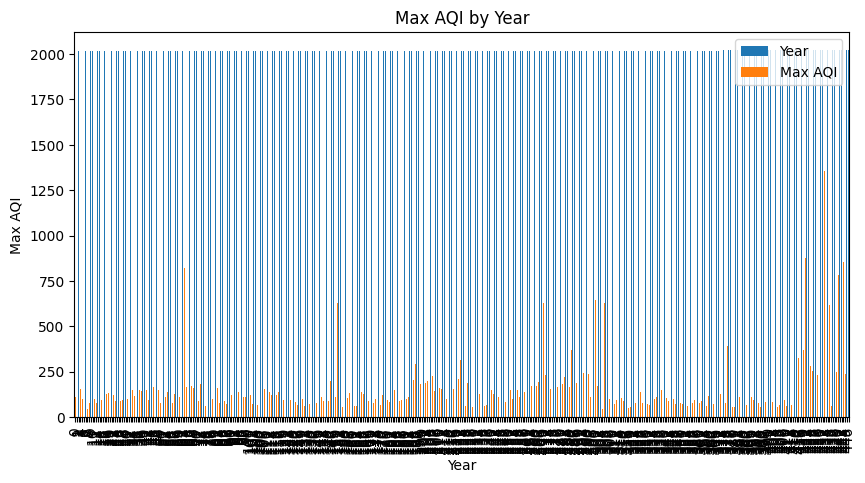

In [64]:
max_AQI_df.plot(kind="bar", figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Max AQI")
plt.title("Max AQI by Year")
plt.show()

In [ ]:
# 